## Setup packages

In [1]:
!pip install git+https://github.com/usgs/geomag-algorithms.git

  Cloning https://github.com/usgs/geomag-algorithms.git to /tmp/pip-req-build-x1ugv5jj
  Running command git clone -q https://github.com/usgs/geomag-algorithms.git /tmp/pip-req-build-x1ugv5jj
  Stored in directory: /tmp/pip-ephem-wheel-cache-rrpdm4ct/wheels/dc/8b/cb/0141ac2aa76db65e2037c96bf61b63c26a64a1eb4ddb6f7eeb
Successfully built geomag-algorithms


In [1]:
!pip install git+https://github.com/samiriff/scikit-dataaccess-ode.git --upgrade

  Cloning https://github.com/samiriff/scikit-dataaccess-ode.git to /tmp/pip-req-build-jwvt9cym
  Running command git clone -q https://github.com/samiriff/scikit-dataaccess-ode.git /tmp/pip-req-build-jwvt9cym
  Stored in directory: /tmp/pip-ephem-wheel-cache-la9bn9e7/wheels/94/32/44/d60e0ce15a9593baec955d92a45977ccf9869316c9e698efa7
Successfully built scikit-dataaccess
  Found existing installation: scikit-dataaccess 1.9.17.post2
    Uninstalling scikit-dataaccess-1.9.17.post2:
      Successfully uninstalled scikit-dataaccess-1.9.17.post2


## Import Modules

In [0]:
%matplotlib notebook

from skdaccess.planetary.ode.cache import DataFetcherMini as ODEDF
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import math
%matplotlib inline

## Frame Query for HiRise images

### Constant Parameters for all HiRise Images

In [0]:
target = 'mars'
mission = 'MRO'
instrument = 'HIRISE'

### Variable Parameters

In [3]:
product_type = 'RDRV11'
western_lon = 55.18
eastern_lon = 55.31
min_lat = -26.9
max_lat = -26.66
product_id = '*029815_1530*COLOR*'

hirise_data_fetcher = ODEDF(target, mission, instrument, product_type,
                            western_lon, eastern_lon, min_lat, max_lat,
                            product_id = product_id)
hirise_data = hirise_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MRO&iid=HIRISE&pt=RDRV11&westernlon=55.18&easternlon=55.31&minlat=-26.9&maxlat=-26.66&query=product&results=fp&output=XML&limit=10&offset=0&productid=*029815_1530*COLOR*

Files that will be downloaded (if not previously downloaded):

Product ID: ESP_029815_1530_COLOR
File name: ESP_029815_1530_COLOR.abrowse.jpg
Description: ANNOTATED BROWSE
File name: ESP_029815_1530_COLOR.browse.jpg
Description: BROWSE
File name: ESP_029815_1530_COLOR.thumb.jpg
Description: THUMBNAIL
File name: ESP_029815_1530_IRB.NOMAP.browse.jpg
Description: IRB BROWSE
File name: ESP_029815_1530_IRB.NOMAP.thumb.jpg
Description: IRB THUMBNAIL
File name: ESP_029815_1530_MIRB.abrowse.jpg
Description: ANNOTATED MERGED IRB BROWSE
File name: ESP_029815_1530_MIRB.browse.jpg
Description: MERGED IRB BROWSE
File name: ESP_029815_1530_MIRB.LBL
Description: MERGED IRB LABEL
File name: ESP_029815_1530_MIRB.thumb.jpg
Description: MERGED IRB THUMBNAIL
File name: ESP_0

15it [00:01,  8.51it/s]

Processing complete


In [38]:
hirise_data

### All Data Products that match the Query

In [4]:
hirise_data.data.keys() 

odict_keys(['ESP_029815_1530_COLOR'])

### All types of JPG images for a given data product

In [5]:
product = 'ESP_029815_1530_COLOR'
hirise_data.data[product].keys()

odict_keys(['ANNOTATED BROWSE', 'BROWSE', 'THUMBNAIL', 'IRB BROWSE', 'IRB THUMBNAIL', 'ANNOTATED MERGED IRB BROWSE', 'MERGED IRB BROWSE', 'MERGED IRB THUMBNAIL', 'ANNOTATED MERGED RGB BROWSE', 'MERGED RGB BROWSE', 'MERGED RGB THUMBNAIL', 'RGB BROWSE', 'RGB THUMBNAIL'])

### Sample Image

In [6]:
image_type = 'ANNOTATED MERGED IRB BROWSE'
image = hirise_data.data[product][image_type]
image.shape

(5105, 2048, 3)

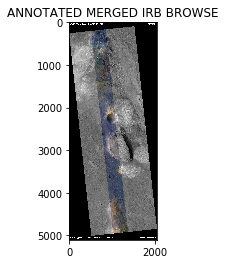

In [8]:
plt.title(image_type)
plt.imshow(image)

### Grid of all images found for a specific product

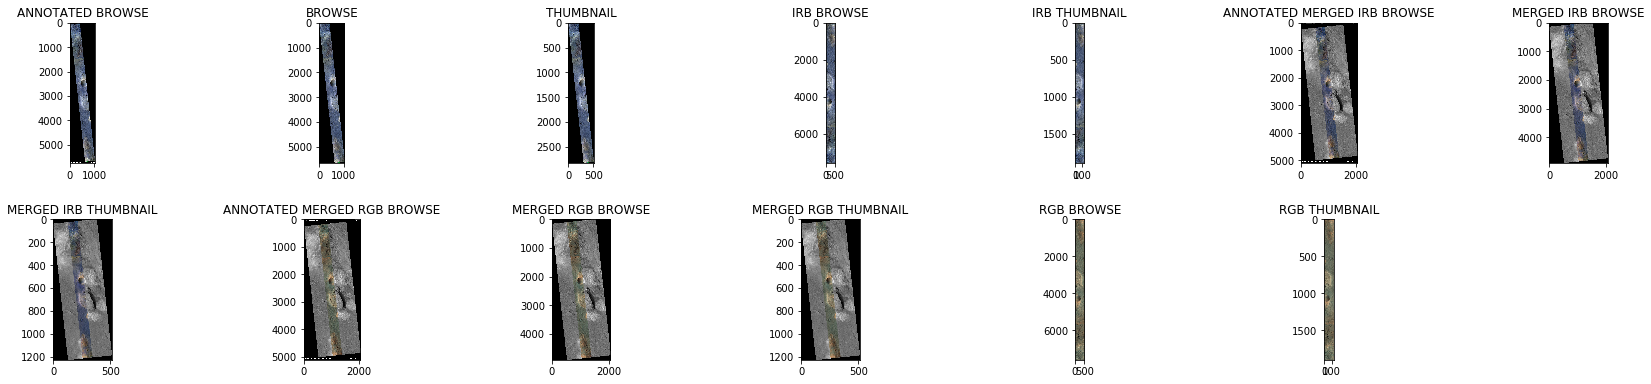

In [37]:
fig = plt.figure()
fig.subplots_adjust(left = 0.125, right = 4, bottom = 0.1, top = 4, hspace=0.4, wspace=0.4)

nrows = math.floor(len(hirise_data.data[product]) / 2)
ncols = math.ceil(len(hirise_data.data[product]) / 2)
i = 1
for key, image in hirise_data.data[product].items():
    ax = fig.add_subplot(nrows, ncols, i)
    ax.set_title(key)
    ax.imshow(image)
    i += 1